In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
def get_data():
  df = pd.read_csv("C:/Users/TANNERU/Downloads/Dataset for coding/ecommerce_data.csv")

  # easier to work with numpy array
  data = df.values

  # shuffle it
  np.random.shuffle(data)

  # split features and labels
  X = data[:,:-1]
  Y = data[:,-1].astype(np.int32)
  
  print(X.shape)
  print(Y.shape)

  # one-hot encode the categorical data
  # create a new matrix X2 with the correct number of columns
  N, D = X.shape
  X2 = np.zeros((N, D+3))
  print(X2.shape)
  X2[:,0:(D-1)] = X[:,0:(D-1)] # non-categorical

  # one-hot
  for n in range(N):
      t = int(X[n,D-1])
      X2[n,t+D-1] = 1


  # assign X2 back to X, since we don't need original anymore
  X = X2
  print(X.shape)

  # split train and test
  Xtrain = X[:-100]
  Ytrain = Y[:-100]
  Xtest = X[-100:]
  Ytest = Y[-100:]

  # normalize columns 1 and 2
  for i in (1, 2):
    m = Xtrain[:,i].mean()
    s = Xtrain[:,i].std()
    Xtrain[:,i] = (Xtrain[:,i] - m) / s
    Xtest[:,i] = (Xtest[:,i] - m) / s

  return Xtrain, Ytrain, Xtest, Ytest


def get_binary_data():
  # return only the data from the first 2 classes
  Xtrain, Ytrain, Xtest, Ytest = get_data()
  X2train = Xtrain[Ytrain <= 1]
  Y2train = Ytrain[Ytrain <= 1]
  X2test = Xtest[Ytest <= 1]
  Y2test = Ytest[Ytest <= 1]
  return X2train, Y2train, X2test, Y2test


In [49]:
def y2indicator(Y,K):
    N = len(Y)
    ind = np.zeros((N,K))
    for i in range(N):
        ind[i,Y[i]] = 1
        return ind
    
    
    
Xtrain,Ytrain,Xtest,Ytest = get_data()
print("Xtrain",Xtrain.shape)
print("Xtest",Xtest.shape)
print("Ytrain",Ytrain.shape)
print("Ytest",Ytest.shape)    
    
D = Xtrain.shape[1] #8 inputs
K = len(set(Ytrain) | set(Ytest))# 4 classes
M = 5 # % hidden units
print(D)
print(K)
print(M)


#converting ytrain and ytest values to indicator values

Ytrain_ind = y2indicator(Ytrain,K) 
Ytest_ind = y2indicator(Ytest,K)
print("Ytrain_ind",Ytrain_ind.shape) 
print("Ytest_in",Ytest_ind.shape)


#initializing weights and bias
w1 = np.random.randn(D,M) #[8,5]
b1 = np.zeros(M) #5
w2 = np.random.randn(M,K) #[5,4]
b2 = np.zeros(K) #[4]


#Activation function
def softmax(a):
    expA = np.exp(a) #exponential values
    return expA/expA.sum(axis = 1 ,keepdims = True) #probabilties 


def forward(X,w1,b1,w2,b2):
    Z = np.tanh(X.dot(w1)+b1) #hidden layer values with tanh activation function
    return softmax(Z.dot(w2)+b2),Z #probabilities  Output layer values with softmaxa activation function



def predict(P_Y_X):
    return np.argmax(P_Y_X,axis = 1) #returns  1 for index which is having high value in a row


#Actual ,finalPredicted
def classification_rate(y,p):
    return np.mean(y == p)


#targets (validation) ,probabilities 
def cross_entropy(T,py):
    return -np.mean(T*np.log(py))



train_costs = []
test_costs = []
learning_rate = 0.00001


for i in range(10000):
    pytrain,Ztrain = forward(Xtrain, w1, b1, w2, b2)
    #Ztrain = forward(Xtrain, w1, b1, w2, b2)#probabilities  for training 
    pytest,Ztest = forward(Xtest, w1, b1, w2, b2) #probailities for testing
    #Ztest = forward(Xtrain, w1, b1, w2, b2)
    
    ctrain = cross_entropy(Ytrain_ind,pytrain) #validation & predicted probabilities
    ctest = cross_entropy(Ytest_ind,pytest)
    
    train_costs.append(ctrain)
    test_costs.append(ctest)
    
    #gradient descent
    w2 -= learning_rate*Ztrain.T.dot(pytrain-Ytrain_ind)
    b2 -= learning_rate*(pytrain-Ytrain_ind).sum(axis = 0)
    delta = (pytrain-Ytrain_ind).dot(w2.T)*(1-Ztrain*Ztrain)
    w1 -= learning_rate*Xtrain.T.dot(delta)
    b1 -= learning_rate*delta.sum(axis = 0)
    
    if i % 1000 == 0:
        print(i,ctrain,ctest)
        
        
        
print("Classification_rate training",classification_rate(Ytrain,predict(pytrain)))
print("Classification_rate testing",classification_rate(Ytest,predict(pytest)))
    
    
    

(500, 5)
(500,)
(500, 8)
(500, 8)
Xtrain (400, 8)
Xtest (100, 8)
Ytrain (400,)
Ytest (100,)
8
4
5
Ytrain_ind (400, 4)
Ytest_in (100, 4)
0 0.001264813276909432 0.013263598385417458
1000 0.000817148397509809 0.003159559834006076
2000 0.0008589260450022101 0.003499495395394512
3000 0.0008593042745982823 0.0034955833747772926
4000 0.0008603932511416773 0.003484251925057638
5000 0.0008609457853323288 0.003479215199687873
6000 0.0008612387674964067 0.003476678550845642
7000 0.0008614068419192448 0.0034752454639965986
8000 0.0008615099754298501 0.0034743649735181122
9000 0.0008615767947098086 0.003473789090885479
Classification_rate training 0.295
Classification_rate testing 0.27


(500, 5)
(500,)
(500, 8)
(500, 8)
0 0.6313160157892852 0.6768293672819212
1000 0.020118804438560223 0.027192679931266985
2000 0.015978268785182857 0.026135728583668198
3000 0.014622337695157549 0.02653057827781732
4000 0.012576634158756879 0.029101010978278788
5000 0.011147629027189647 0.033726492469578026
6000 0.010036812330126734 0.04174722871957856
7000 0.008525444571439859 0.04697070078641649
8000 0.007394346593790435 0.04903196032020812
9000 0.00659658933093504 0.05089495996927159
Final train classification_rate: 0.9975
Final test classification_rate: 0.96


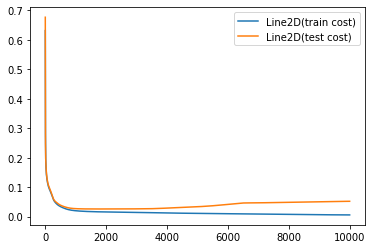

In [50]:
#c
def y2indicator(y, K):
    N = len(y)
    ind = np.zeros((N, K))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

Xtrain, Ytrain, Xtest, Ytest = get_data()


D = Xtrain.shape[1] 
K = len(set(Ytrain) | set(Ytest))
M = 5 # num hidden units

# convert to indicator
Ytrain_ind = y2indicator(Ytrain, K)
Ytest_ind = y2indicator(Ytest, K)

# randomly initialize weights
W1 = np.random.randn(D, M)
b1 = np.zeros(M)
W2 = np.random.randn(M, K)
b2 = np.zeros(K)

# make predictions
def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis=1, keepdims=True)

def forward(X, W1, b1, W2, b2):
    Z = np.tanh(X.dot(W1) + b1)
    return softmax(Z.dot(W2) + b2), Z

def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

# calculate the accuracy
def classification_rate(Y, P):
    return np.mean(Y == P)

def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY))


# train loop
train_costs = []
test_costs = []
learning_rate = 0.001
for i in range(10000):
    pYtrain, Ztrain = forward(Xtrain, W1, b1, W2, b2)
    pYtest, Ztest = forward(Xtest, W1, b1, W2, b2)

    ctrain = cross_entropy(Ytrain_ind, pYtrain)
    ctest = cross_entropy(Ytest_ind, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)

    # gradient descent
    W2 -= learning_rate*Ztrain.T.dot(pYtrain - Ytrain_ind)
    b2 -= learning_rate*(pYtrain - Ytrain_ind).sum(axis=0)
    dZ = (pYtrain - Ytrain_ind).dot(W2.T) * (1 - Ztrain*Ztrain)
    W1 -= learning_rate*Xtrain.T.dot(dZ)
    b1 -= learning_rate*dZ.sum(axis=0)
    if i % 1000 == 0:
        print(i, ctrain, ctest)

print("Final train classification_rate:", classification_rate(Ytrain, predict(pYtrain)))
print("Final test classification_rate:", classification_rate(Ytest, predict(pYtest)))

legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()

In [29]:
K = len(set(Ytrain) | set(Ytest))

In [31]:
K

4